Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

USING THE DATA BY MOUNTING THE GOOGLE DRIVE

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir_train, 
    seed = 123,
    validation_split = 0.2,
    subset = "training",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = "validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

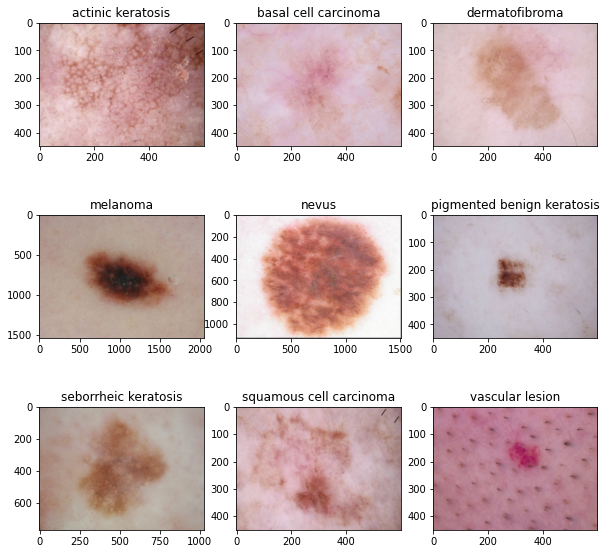

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 429s 2s/step - loss: 2.0489 - accuracy: 0.2104 - val_loss: 2.0248 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 9s 154ms/step - loss: 2.0333 - accuracy: 0.1931 - val_loss: 2.0318 - val_accuracy: 0.2237
Epoch 3/20
56/56 [==============================] - 9s 154ms/step - loss: 2.0104 - accuracy: 0.2210 - val_loss: 1.9421 - val_accuracy: 0.2438
Epoch 4/20
56/56 [==============================] - 9s 155ms/step - loss: 1.9581 - accuracy: 0.2528 - val_loss: 2.0472 - val_accuracy: 0.2215
Epoch 5/20
56/56 [==============================] - 9s 155ms/step - loss: 1.9558 - accuracy: 0.2578 - val_loss: 1.9118 - val_accuracy: 0.2685
Epoch 6/20
56/56 [==============================] - 9s 155ms/step - loss: 1.7893 - accuracy: 0.3365 - val_loss: 1.6821 - val_accuracy: 0.3669
Epoch 7/20
56/56 [==============================] - 9s 155ms/step - loss: 1.6898 - accuracy: 0.3811 - val_loss: 1.7523 - val_accuracy: 0.3445
Epoch 8/20
56/56 [

### Visualizing training results

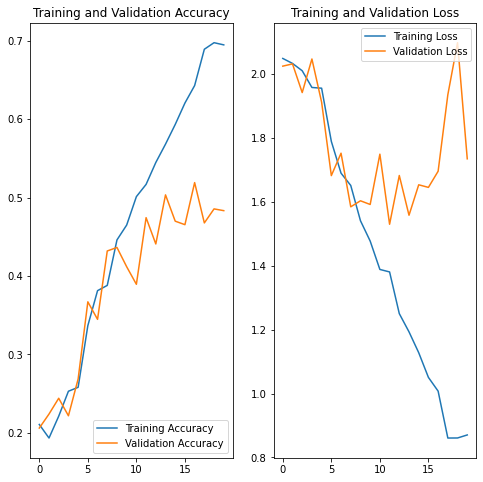

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



*   For any system accuracy of 60% or more is acceptable. Anything below is 60 is not a good model for classification.
*   Increase in epochs increases the test accuracy.
*   Here our model is overfitting, comparatively model scores are high on the train set and low on the validation set.
*   The accuracy is just around 60 - 70% because there are enough features to remember the pattern.
*   But again, it's too early to comment on the overfitting & underfitting debate.







In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.

data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

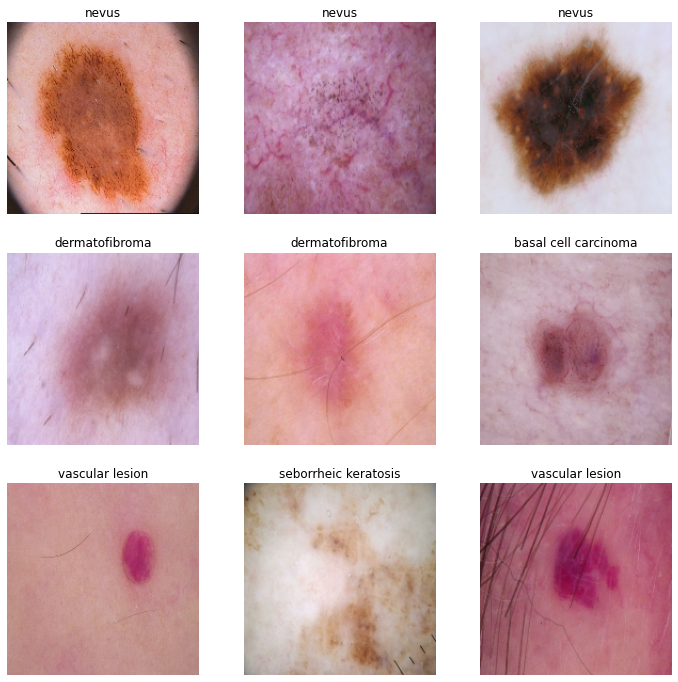

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))




### Compiling the model

In [20]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
) 

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 13s 184ms/step - loss: 2.0860 - accuracy: 0.1964 - val_loss: 2.0742 - val_accuracy: 0.2953
Epoch 2/20
56/56 [==============================] - 10s 171ms/step - loss: 1.9316 - accuracy: 0.2801 - val_loss: 1.8444 - val_accuracy: 0.3423
Epoch 3/20
56/56 [==============================] - 10s 172ms/step - loss: 1.7907 - accuracy: 0.3510 - val_loss: 1.7206 - val_accuracy: 0.3445
Epoch 4/20
56/56 [==============================] - 10s 172ms/step - loss: 1.6950 - accuracy: 0.3901 - val_loss: 1.6133 - val_accuracy: 0.4228
Epoch 5/20
56/56 [==============================] - 10s 172ms/step - loss: 1.6516 - accuracy: 0.3917 - val_loss: 1.5918 - val_accuracy: 0.4049
Epoch 6/20
56/56 [==============================] - 10s 172ms/step - loss: 1.6350 - accuracy: 0.3951 - val_loss: 1.7310 - val_accuracy: 0.3937
Epoch 7/20
56/56 [==============================] - 10s 172ms/step - loss: 1.5942 - accuracy: 0.4319 - val_loss: 1.5746 - val_accuracy: 0.4586
Epoch 8/20

### Visualizing the results

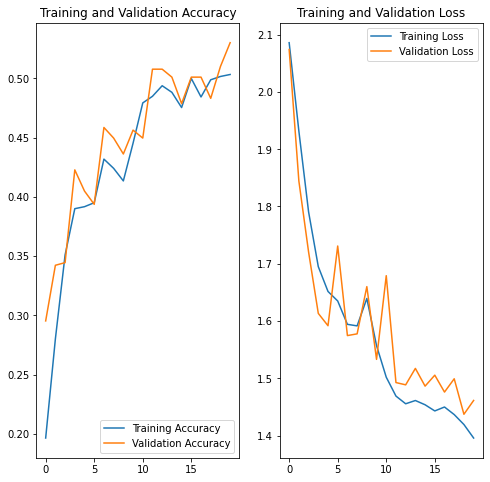

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



1.   There is no improvement in the accuracy but overfitting problem is solved due to data augmentation.
2.   Increasing epochs may increase the accuracy in this case.



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.

path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
1,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
2,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
3,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
4,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion
2235,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion
2236,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion
2237,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion


<BarContainer object of 9 artists>

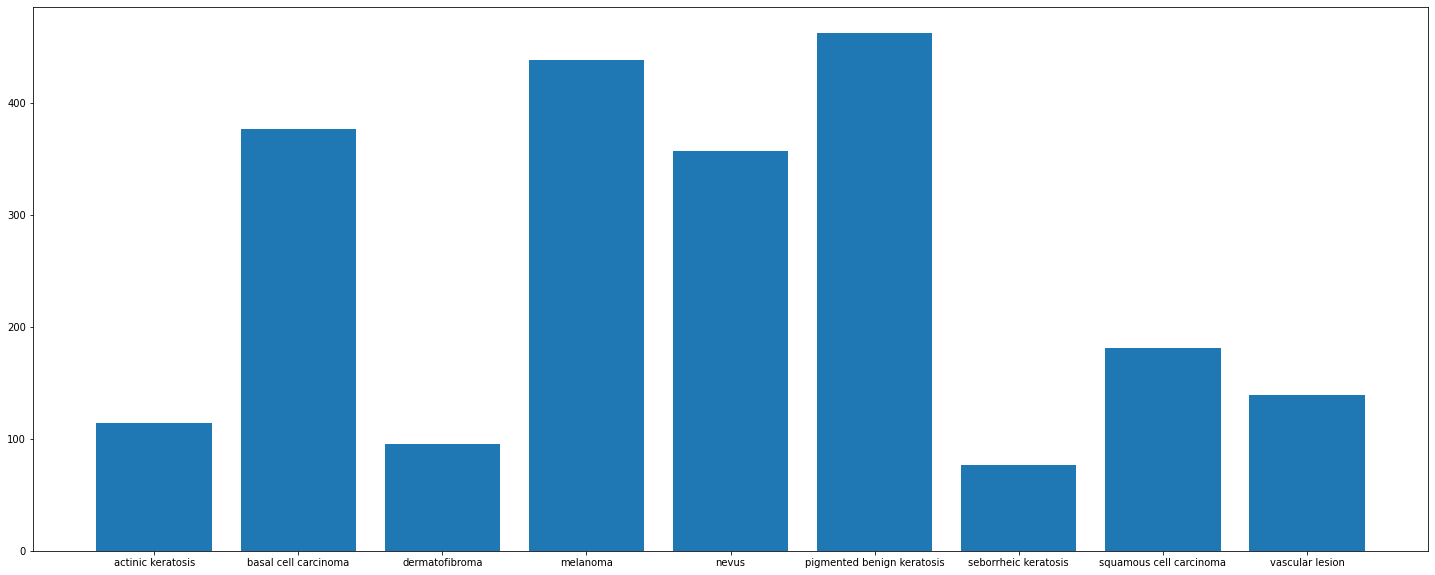

In [26]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?




*   Answer 1: Seborrheic Keratosis has least number of samples.
*   Answer 2 : Melanoma and Pigmented benign keratosis dominate the data in terms of proportionate number of samples.







In [27]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
#path_to_training_dataset=/content/drive/MyDrive/CNN ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train" , save_format="jpg")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBA7DA055D0>: 100%|██████████| 500/500 [00:57<00:00,  8.73 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FBA7FC1C490>: 100%|██████████| 500/500 [00:53<00:00,  9.30 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBA7DAD2A50>: 100%|██████████| 500/500 [00:54<00:00,  9.19 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FBA7DD16FD0>: 100%|██████████| 500/500 [00:47<00:00, 10.53 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBA7DD6A3D0>: 100%|██████████| 500/500 [00:56<00:00,  8.79 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBA7EFA9590>: 100%|██████████| 500/500 [00:45<00:00, 11.02 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FBA7FCCA850>: 100%|██████████| 500/500 [00:52<00:00,  9.58 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBA7DA3D150>: 100%|██████████| 500/500 [00:56<00:00,  8.84 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FBA7FC97E50>: 100%|██████████| 500/500 [00:47<00:00, 10.45 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [31]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
1,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
2,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
3,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
4,/content/drive/MyDrive/assignments/Skin cancer...,actinic keratosis
...,...,...
6734,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion
6735,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion
6736,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion
6737,/content/drive/MyDrive/assignments/Skin cancer...,vascular lesion


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    1381
melanoma                      1308
basal cell carcinoma          1142
nevus                         1077
squamous cell carcinoma        502
vascular lesion                422
actinic keratosis              356
dermatofibroma                 284
seborrheic keratosis           267
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

In [34]:
import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")

In [35]:
data_dir_train1

PosixPath('/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output')

#### **Todo:** Create a training dataset

In [36]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [37]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

4500


In [38]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_dir_train1=pathlib.Path("/content/drive/MyDrive/assignments/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(BatchNormalization()),
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization()),
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization()),
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization()),
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [44]:
epochs =30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


113/113 [==============================] - 32s 260ms/step - loss: 5.0089 - accuracy: 0.3811 - val_loss: 5.3817 - val_accuracy: 0.2600
Epoch 2/30
113/113 [==============================] - 28s 239ms/step - loss: 3.6209 - accuracy: 0.4764 - val_loss: 4.6243 - val_accuracy: 0.1922
Epoch 3/30
113/113 [==============================] - 29s 243ms/step - loss: 3.4532 - accuracy: 0.5158 - val_loss: 3.1461 - val_accuracy: 0.5067
Epoch 4/30
113/113 [==============================] - 28s 234ms/step - loss: 2.8272 - accuracy: 0.5669 - val_loss: 27.5072 - val_accuracy: 0.2189
Epoch 5/30
113/113 [==============================] - 27s 231ms/step - loss: 2.2858 - accuracy: 0.6092 - val_loss: 3.0741 - val_accuracy: 0.4578
Epoch 6/30
113/113 [==============================] - 28s 236ms/step - loss: 2.0735 - accuracy: 0.6358 - val_loss: 3.0880 - val_accuracy: 0.5544
Epoch 7/30
113/113 [==============================] - 28s 234ms/step - loss: 1.6946 - accuracy: 0.6892 - val_loss: 3.4642 - val_accuracy: 0.

#### **Todo:**  Visualize the model results

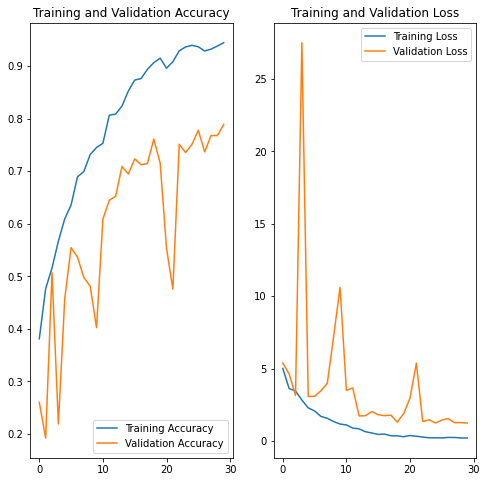

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?





*   Accuracy on training data increased after using Augmentor library.

*   Model is still overfitting.
*   This problem of overfitting can be solved by adding layer,neurons or adding dropout layers.


*   This Model can be further improved by tuning the hyperparameter.

